### Advanced Hypothesis Testing

This assignment aims to enhance proficiency in statistical analysis and hypothesis testing in Python utilizing real-world datasets to conduct hypothesis tests for paired data, multiple population means, and variance comparison, cultivating a deeper understanding of the statistical method's limitation and reliability through exploring assumptions, potential consequences of violating them, and their remedies.

In [34]:
#! pip install researchpy

In [38]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import math as mt
import seaborn as sns
import statistics as st
from math import sqrt 
import researchpy as rp

__Task 1: Paired Data Analysis__

*Find a suitable dataset with paired data from a reliable source.
Write a Jupyter notebook to import the dataset and perform a hypothesis test for paired data.
Explain the problem, data, research question, and the appropriate statistical test that you would use to address the research question.
Discuss the assumptions underlying the hypothesis test, potential consequences of violating these assumptions, and possible remedies.
Propose a Python tool to assist with the interpretation of the results of the statistical test and visualizations.
Record a 3- to 4-minute video explaining the analysis, results, and interpretation of the hypothesis test.*

For this task, we will be using a cancer dataset and a paried t-test to determine if the difference of means between two samples in the dataset is zero. This dataset collected prevalance of cancer before and after the chernobyl disaster. A paired t-test can help us determine if the event is correlated with an average increase in cancer rates per 100000 people. 

Assumptions of this test are that the dependent variable is continous, variables are independent of one another, there is normal distribution in the dependent variable, and that the dependent variable does not contain outliers. Potential consequences of violating these hypothesis when the data does not meet these assumptions could be use of a subpar test. Other tests can better predict a significant difference between means when there is dependency and outliers in a data set. Other issues caused when the data violates these assumptions are erroneous results. Remedies include removing outliers or using a better fit test for the data such as a nonparametric test. 

In [2]:
#read data and print first 5 rows
df1 = pd.read_csv('cancer_before_and_after_Chernobyl_Belarus.csv')
df1.head()

,year,sex,location,cancer_type,cases
0,1985,women,Gomel,skin,17.3
1,1985,women,Mogilev,skin,16.8
2,1986,women,Gomel,skin,15.6
3,1986,women,Mogilev,skin,18.3
4,1985,women,Belarus,skin,14.9


In [3]:
#print info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         84 non-null     int64  
 1   sex          84 non-null     object 
 2   location     84 non-null     object 
 3   cancer_type  84 non-null     object 
 4   cases        84 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.4+ KB


Looking at the dataset, we can verify that the data for cases is continous, which meets the assumptions of our test.

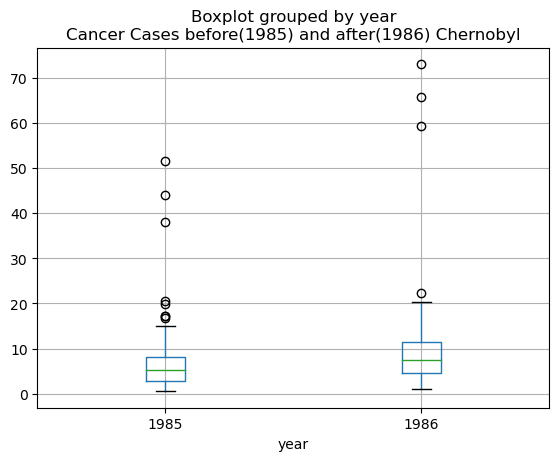

In [4]:
#look for outliers in the dataset by visualizing with a boxplot
df1.boxplot(column ='cases', by= 'year')
plt.title('Cancer Cases before(1985) and after(1986) Chernobyl')
plt.show()

From a simple boxplot we can visualize higher counts of cancer cases after chernobyl than before. To meet the assumptions of the t-test we need to remove outliers. 

In [5]:
# remove outliers
#calculate quantiles for each group
low = 0.05
high = 0.95
res = df1.groupby('year')['cases'].quantile([low, high]).unstack(level=1)

# Filter rows within the quantile range
df1 = df1[((res.loc[df1['year'], low] < df1['cases'].values) &
                  (df1['cases'].values < res.loc[df1['year'], high])).values]

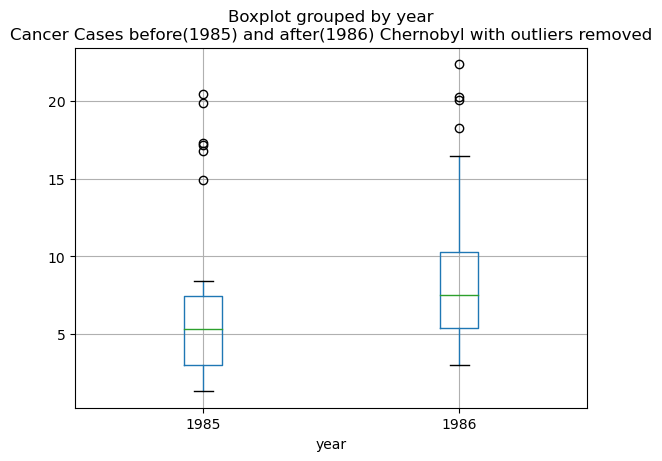

In [6]:
#show data distribution without outliers
df1.boxplot(column ='cases', by= 'year')
plt.title('Cancer Cases before(1985) and after(1986) Chernobyl with outliers removed')
plt.show()

In [7]:
#group by year to get count of cases by year
before = df1['cases'].loc[df1['year']==1985]
after = df1['cases'].loc[df1['year']==1986]

In [8]:
#test for independence using chi-square
stat, p, dof, expected = stats.chi2_contingency([before,after])

alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('The data is dependent and violates the assumption of our test')
else:
    print('The data is independent and meets the assumptions of our test')

p value is 0.9999932505356331
The data is independent and meets the assumptions of our test


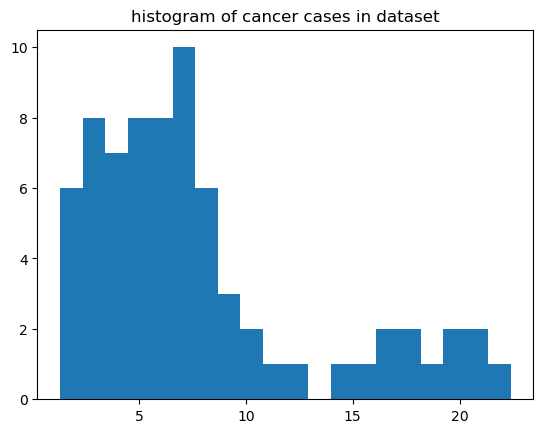

In [19]:
#ensure the data follows the normality assumption
plt.hist(df1['cases'], bins=20)
plt.title('histogram of cancer cases in dataset')
plt.show()

In [20]:
#investigate further with shapiro-wilk test for determining normality
stats.shapiro(df1['cases'])

ShapiroResult(statistic=0.8562018871307373, pvalue=7.960708217069623e-07)

The shapiro wilk test confirms that our data violates the assumption that our dependent variable follows a normal distribution. The assumption of normality, is not one that greatly impacts the t-test, but it is important to recognize that there may be a more appropriate test for this data.

In [10]:
print('The mean amount of cases for men/women across groups BEFORE chernobyl is : ', np.mean(before))
print('The mean amount of cases for men/women across groups AFTER chernobyl is : ',np.mean(after))

The mean amount of cases for men/women across groups BEFORE chernobyl is :  6.694444444444446
The mean amount of cases for men/women across groups AFTER chernobyl is :  8.825


In [22]:
# perform paired samples t-test
t_statistic, p_value = stats.ttest_rel(after, before, alternative='greater')
# display the results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

t-statistic: 9.195766381281832
p-value: 3.627015031870568e-11


The t-test statitistic is 9.19 with a p-value of 3.62 x 10^-11. 

This low p-value informs us that this result is statistically significant. If we were to accept the null hypothesis that the means before and after were not different, than the t-test would be equal to zero. In this we reject the null hypothesis, and can confirm there is a significant difference between means

Due to our data not following a normal distribution, it may be more appropriate to use a wilcoxon-signed rank test. This test allows for non-normalized data to determine if the paired groups are identically distributed. The other assumptions for this test are the same. 

In [21]:
#conduct wicoxon-signed-rank test
stats.wilcoxon(before,after)

WilcoxonResult(statistic=16.0, pvalue=6.324977190503043e-07)

With the wilcoxon t-test, we still reject the null value and determine that the mean for cancer cases before and after chernobyl are statistically significant. Indicationg a correlation between chernobyl and an increase of cancer cases. As for causality, much research has been conducted between radiation and cancer. So, we can determine that the chernobyl disaster caused a significant increase in cancer cases. 

__Task 2: Multiple Population Means Analysis__

*Find a suitable dataset with more than two populations means from a reliable source.
Continuing in the same Jupyter notebook, write a code to import the dataset and perform a hypothesis test for more than two population means.
Explain the problem, data, research question, and the appropriate statistical test that you would use to address the research question.
Discuss the assumptions underlying the hypothesis test, potential consequences of violating these assumptions, and possible remedies.
Propose a Python tool to assist with the interpretation of the results of the statistical test and visualizations.
Record a 3- to 4-minute video explaining the analysis, results, and interpretation of the hypothesis test.*

In this task, we observe 6 different levels of parental education to determine if there is a significant impact on students' mean reading score. The dataset obtained from kaggle groups individuals on multiple features. For the parental education feature the 5 populations are based of highest parental education completed as follows: some high school, high school, some college, associates degree, and bachelors degree, masters degree. 

For this test, ANOVA will be used as it allows for the comparison of more than 2 population means. Anova compares means and variances between and within population groups to determine if the differnce of means is significant. An Anova one-way test is appropriate since our groups are of the same category. Assumptions of data analyzed with anova are normality, equal variances between populations, and independence of groups from one enother. If these assumptions are violates, the test results are unrelaible. 

In [23]:
df2 = pd.read_csv('StudentsPerformance.csv')
df2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
#use info to check data types and non-null counts
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [28]:
#check for null values
df2.count().isna()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [43]:
#rename columns of interest
df2.rename(columns={'reading score': 'reading_score', 'parental level of education': 'parent_ed'}, inplace=True)

In [44]:
#find names for parental education
df2['parent_ed'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [46]:
#get summary statistics of overall reading score mean
rp.summary_cont(df2['reading_score'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,reading_score,1000.0,69.169,14.6002,0.4617,68.263,70.075


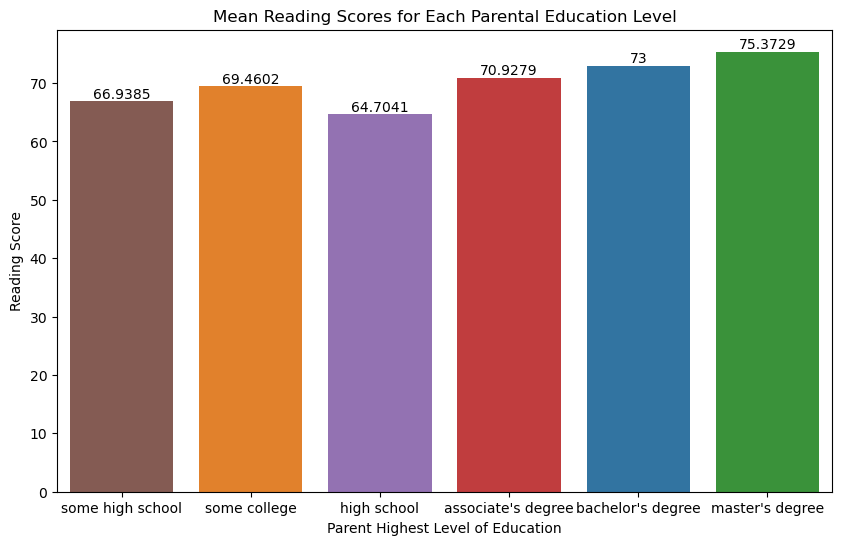

In [68]:
#plt means of groups
ax = plt.figure(figsize=(10,6))
ax = sns.barplot(data=df2, x='parent_ed', y='reading_score', hue='parent_ed',
                 estimator = 'mean', errorbar=None, order = df2.sort_values('reading_score').parent_ed)
ax.set_xlabel('Parent Highest Level of Education')
ax.set_ylabel('Reading Score')
ax.set_title('Mean Reading Scores for Each Parental Education Level')
for i in ax.containers:
    ax.bar_label(i,)

From the bar plot above of means by parental education level, student who had parents with a college degree competed out perfomed the overall mean, especially those who had a parent with a masters degree. Those who had a parent with some college, had an overall mean consistent with the overall mean of the whole population. Students who had parent with some highschool, or all highschool completed had a lower than average reading score. We can investigate the significance of these mean differences with ANOVA. 

In [47]:
#use stats model to create a model that we can check assumptions on
model = ols("reading_score ~ C(parent_ed)", data=df2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(parent_ed),9506.493193,5.0,9.2894,1.168246e-08
Residual,203445.945807,994.0,NaN,NaN


In [140]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          reading_score   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     9.289
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           1.17e-08
Time:                        21:36:30   Log-Likelihood:                -4076.6
No. Observations:                1000   AIC:                             8165.
Df Residuals:                     994   BIC:                             8195.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            70.9279      0.960     73.869      0.000      69.044      72.812
C(parent_ed)[T.bachelor's degree]     2.0721      1.630      1.271      0.204      -1.126       5.270
C(parent_ed)[T.high school]          -6.2238      1.402     -4.439      0.000      -8.975      -3.472
C(parent_ed)[T.master's degree]       4.4450      2.095      2.121      0.034       0.333       8.557
C(parent_ed)[T.some college]         -1.4678      1.352     -1.086      0.278      -4.121       1.185
C(parent_ed)[T.some high school]     -3.9894      1.437     -2.776      0.006      -6.810      -1.169
==============================================================================
Omnibus:                       12.012   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.173
Skew:                          -0.256   Prob(JB):                      0.00227
Kurtosis:                       2.825   Cond. No.                         6.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The F-statistic shows that there is a significant difference between reading score means at the various education levels, along with the very low p-value (PR>(F)). The F-statistic shows that the variance between groups is 9.2 times the variance within groups.

In [48]:
#check normality assumption
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9933309555053711, pvalue=0.0001872272987384349)

Here the p-value is lightly below the threshold to reject the null hypothesis that the data follows a normal ditribution. We can use a QQ plot to further investigate.

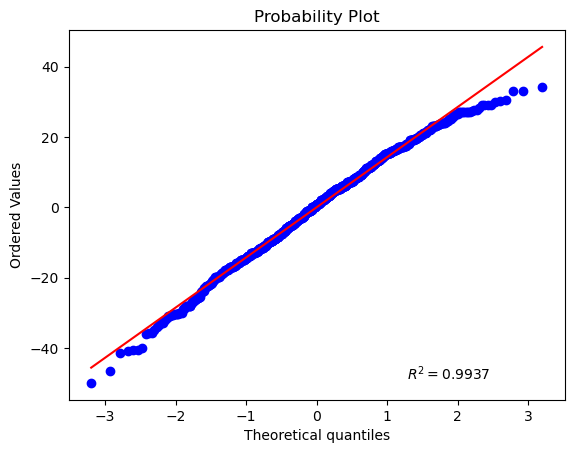

In [73]:
normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
plt.show()

While the non-conformance of residuals in our dataset to a normal distribution is minor, we may want to validate our hypothesis with a test that does not have normality as an assumption.

In [75]:
#store independent populations reading scores for later use
some_hs = df2['reading_score'].loc[df2['parent_ed'] == 'some high school']
hs = df2['reading_score'].loc[df2['parent_ed'] == 'high school']
some_col = df2['reading_score'].loc[df2['parent_ed'] == 'some college']
associate = df2['reading_score'].loc[df2['parent_ed'] == "associate's degree"]
bachelor = df2['reading_score'].loc[df2['parent_ed'] == "bachelor's degree"]
master = df2['reading_score'].loc[df2['parent_ed'] == "master's degree"]

In [76]:
#use kruskal anova testing on the data
stats.kruskal(some_hs, hs, some_col, associate, bachelor, master)

KruskalResult(statistic=38.66488816395158, pvalue=2.773717256928065e-07)

The Kruskal-Wallis test is another type of one way ANOVA testing that is not parametric. WIth a significant p-value, we validate that there is a statistical difference between groups of highest parent level of education. 

In [74]:
# Investigate equal variance assumption
#use levene method to investigate
stats.levene(some_hs, hs, some_col, associate, bachelor, master)

LeveneResult(statistic=0.40769671798537177, pvalue=0.8436575342664048)

The Levene score has a non-significant p-value, which means our data follows the null hypothesis that there is not a statistically significant difference between variances. 
There is no need to test independence of values, since this is validated in our students only belonging to one group of parental education.

__Task 3: Variance Comparison Analysis__

Find a suitable dataset with two or more populations with variances to compare from a reliable source.
Continuing in the same Jupyter notebook, write a code to import the dataset and perform a hypothesis test for variance comparison.
Explain the problem, data, research question, and the appropriate statistical test that you would use to address the research question.
Discuss the assumptions underlying the hypothesis test, potential consequences of violating these assumptions, and possible remedies.
Propose a Python tool to assist with the interpretation of the results of the statistical test and visualizations.
Record a 3- to 4-minute video explaining the analysis, results, and interpretation of the hypothesis test.

This is an excercise dataset from kaggle with various features for over 3000 participants. We can use statistical analysis in python to answer the question how does various BMI ranges and Age play a role calories burned. 

Since there are multiple categories to measure in our problem, we can use a two-way anova test to compare variances between populations. The assumptions are that the data is independent, normalized, and has equal variance. 

In [108]:
df3 = pd.read_csv('exercise_dataset.csv')
df3.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


In [109]:
#drop erroneous column
df3.drop(columns = ['Dream Weight','Weather Conditions'], inplace = True)

In [110]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3864 non-null   int64  
 1   Exercise            3864 non-null   object 
 2   Calories Burn       3864 non-null   float64
 3   Actual Weight       3864 non-null   float64
 4   Age                 3864 non-null   int64  
 5   Gender              3864 non-null   object 
 6   Duration            3864 non-null   int64  
 7   Heart Rate          3864 non-null   int64  
 8   BMI                 3864 non-null   float64
 9   Exercise Intensity  3864 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 302.0+ KB


In [111]:
df3.describe()

,ID,Calories Burn,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,1932.500000,301.861806,75.188440,39.621118,40.190994,139.777950,26.801977,5.457298
std,1115.585048,115.828604,14.845511,12.521721,11.765957,23.447528,4.746745,2.850896
min,1.000000,100.009403,45.783747,18.000000,20.000000,100.000000,18.500014,1.000000
25%,966.750000,202.168837,62.476906,29.000000,30.000000,119.000000,22.686774,3.000000
50%,1932.500000,299.742508,75.544407,40.000000,40.000000,140.000000,26.861656,5.000000
75%,2898.250000,404.143688,88.105767,51.000000,51.000000,160.000000,30.950380,8.000000
max,3864.000000,499.859262,104.309600,60.000000,60.000000,180.000000,34.996639,10.000000


In [112]:
#define and set BMI Range Categories 
def BMI_range(bmi):
    if bmi >= 30:
        return 'Obese'
    elif bmi >= 25.0:
        return 'Overweight'
    elif bmi >= 18.5:
        return 'Healthy Weight'
#create new BMI category    
df3['BMI_category'] = df3['BMI'].apply(BMI_range)

<AxesSubplot:xlabel='BMI_category', ylabel='Exercise Intensity'>

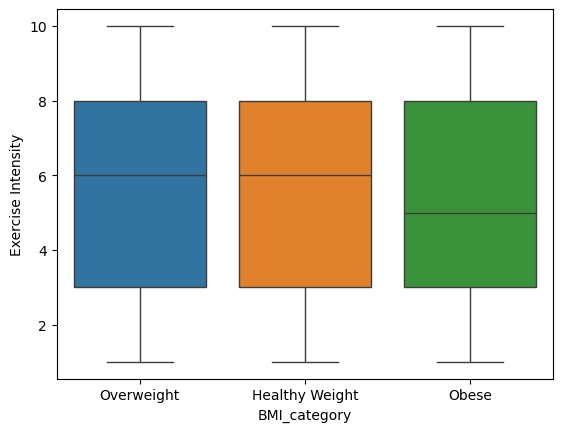

In [114]:
#investigate calories burned for bmi ranges
sns.boxplot(y='Exercise Intensity', x='BMI_category', data=df3, hue='BMI_category')

In [150]:
df3 = df3.rename(columns={'Calories Burn':'calories_burned'})

In [166]:
#fit model for anova testing
model2 = ols(formula = 'calories_burned ~ C(BMI_category) + Age',  
             data = df3).fit()

In [167]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        calories_burned   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4526
Date:                Wed, 27 Mar 2024   Prob (F-statistic):              0.715
Time:                        22:08:47   Log-Likelihood:                -23844.
No. Observations:                3864   AIC:                         4.770e+04
Df Residuals:                    3860   BIC:                         4.772e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       299.6514      6.597     45.421      0.000     286.717     312.586
C(BMI_category)[T.Obese]          3.8704      4.501      0.860      0.390      -4.953      12.694
C(BMI_category)[T.Overweight]     4.8709      4.508      1.080      0.280      -3.968      13.710
Age                              -0.0113      0.149     -0.076      0.939      -0.303       0.281
==============================================================================
Omnibus:                     3469.266   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.595
Skew:                          -0.001   Prob(JB):                     1.14e-51
Kurtosis:                       1.793   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
#specify typ =3 for 3 way ANOVA
sm.stats.anova_lm(model2,typ=2)

,sum_sq,df,F,PR(>F)
C(BMI_category),1.816070e+04,2.0,0.676529,0.508439
Age,7.742332e+01,1.0,0.005768,0.939463
Residual,5.180881e+07,3860.0,NaN,NaN


The model shows that there is no statical significance between BMI category and Age affect calories burned. 
However, the assumptions have not yet been tested, let's investigate. 

In [171]:
#check normality assumption
stats.shapiro(model2.resid)

ShapiroResult(statistic=0.9544028639793396, pvalue=3.887702180898982e-33)

In [172]:
# Investigate equal variance assumption
#use levene method to investigate
stats.levene(Obese, Overweight, Healthy, Age)

LeveneResult(statistic=0.9699818108400879, pvalue=0.4057763709363468)

Further analysis shows that the data does not follow a normal distribution as represented by the shapiro test. The data does fit the assumption of equal variance as shown in the levene result. The categories chosen are independent of one another.  

In [173]:
#Exercise intensity to use in kruskal-wallis test
Obese = df3['calories_burned'].loc[df3['BMI_category']=='Obese']
Overweight = df3['calories_burned'].loc[df3['BMI_category'] == 'Overweight']
Healthy = df3['calories_burned'].loc[df3['BMI_category'] == 'Healthy Weight']
Age = df3['calories_burned'].loc[df3['Age']]

In [174]:
stats.kruskal(Obese, Overweight, Healthy, Age)

KruskalResult(statistic=116.28669181290637, pvalue=4.864726720524359e-25)

Using Kruskal-Wallis test, the p-value does show statistical signifcance that age and BMI range have an impact on calories burned.